# Challenge: What to use
Using selected questions from the 2012 and 2014 editions of the [European Social Survey](http://www.europeansocialsurvey.org/data/round-index.html), address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the [data file](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv). And here is the [codebook](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html), with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

1) Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

2) Did people become happier from 2012 to 2014? Compute results for each country in the sample.

3) Who reported watching more TV in 2012, men or women?

4) Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

5) Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

6) Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

__1) Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.__

In [1]:
# Import dataframe/number packages
import pandas as pd
import numpy as np

# Import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

# Import stat packages
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats.stats import ttest_ind
from scipy.stats.mstats import winsorize
from scipy.stats import zscore
import scipy.stats as stats

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [2]:
df = pd.read_csv('ESSdata_Thinkful.csv')
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [4]:
df.nunique().sort_values()

year          2
gndr          2
partner       2
sclact        5
cntry         6
sclmeet       7
tvtot         8
ppltrst      11
pplfair      11
pplhlp       11
happy        11
agea         83
idno       3086
dtype: int64

In [5]:
df.shape

(8594, 13)

In [6]:
df.dtypes

cntry       object
idno       float64
year         int64
tvtot      float64
ppltrst    float64
pplfair    float64
pplhlp     float64
happy      float64
sclmeet    float64
sclact     float64
gndr       float64
agea       float64
partner    float64
dtype: object

In [7]:
# Count how many nulls there are per column
total_nulls = df.isna().sum()
total_nulls.sort_values(inplace=True, ascending = False)

# Observe the percentage of nulls in each column
percent_nulls = df.isna().sum()* 100 / len(df)
percent_nulls.sort_values(inplace=True, ascending = False)

print('total nulls per column')
print(total_nulls)
print('------------------------\npercent nulls per column')
print(percent_nulls)

total nulls per column
agea       239
sclact      94
pplfair     39
happy       31
pplhlp      25
partner     17
sclmeet     15
ppltrst     14
gndr        10
tvtot        8
year         0
idno         0
cntry        0
dtype: int64
------------------------
percent nulls per column
agea       2.781010
sclact     1.093786
pplfair    0.453805
happy      0.360717
pplhlp     0.290901
partner    0.197812
sclmeet    0.174540
ppltrst    0.162904
gndr       0.116360
tvtot      0.093088
year       0.000000
idno       0.000000
cntry      0.000000
dtype: float64


In [8]:
df_2 = df.dropna().copy()
df_2.shape

(8147, 13)

In [9]:
total_dupes = df_2.duplicated().sum()
print('total duplicate rows: {}'.format(total_dupes))

total duplicate rows: 0


In [10]:
print(df_2.idno.value_counts().sort_values(ascending=False))

1208.0     8
2077.0     8
1247.0     8
1035.0     8
1353.0     8
          ..
2741.0     1
18822.0    1
567.0      1
22224.0    1
2361.0     1
Name: idno, Length: 3076, dtype: int64


In [11]:
display(df_2[df_2['idno'] == 1208])

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
331,CH,1208.0,6,0.0,8.0,8.0,4.0,9.0,6.0,4.0,2.0,38.0,1.0
1104,CH,1208.0,7,2.0,7.0,6.0,4.0,10.0,7.0,2.0,1.0,52.0,1.0
1749,CZ,1208.0,6,7.0,4.0,5.0,5.0,8.0,5.0,4.0,2.0,69.0,2.0
2407,CZ,1208.0,7,1.0,6.0,5.0,6.0,6.0,1.0,3.0,1.0,17.0,2.0
3382,ES,1208.0,6,1.0,8.0,8.0,7.0,10.0,6.0,1.0,2.0,21.0,2.0
4595,ES,1208.0,7,5.0,5.0,9.0,5.0,7.0,6.0,5.0,1.0,48.0,2.0
7123,SE,1208.0,6,2.0,8.0,8.0,7.0,8.0,7.0,4.0,2.0,58.0,1.0
8031,SE,1208.0,7,7.0,8.0,8.0,8.0,7.0,4.0,2.0,2.0,59.0,2.0


C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


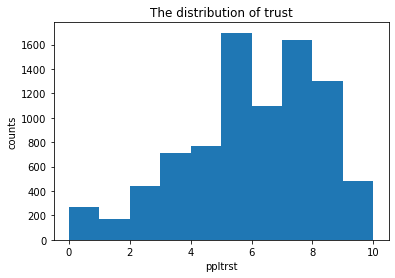

In [12]:
plt.hist(df.ppltrst)
plt.title("The distribution of trust")
plt.xlabel("ppltrst")
plt.ylabel("counts")
plt.show()

### 1) Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [13]:
# 2012 == 6
# 2014 == 7

# calc avg and std for both years for trusting
df_trust = df_2.groupby(['year', 'cntry'])['ppltrst'].agg(['sum', 'mean', 'std']).reset_index()

df_trust.rename(columns={'mean': 'avg_trust'}, inplace=True)

- Hypothesis: People in 2014 trusted less than in 2012.
- Null: People were not less trusting in 2014 than in 2012.

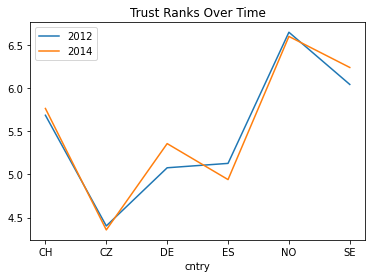

T-Test Results by Year


Ttest_indResult(statistic=-0.09685957689390595, pvalue=0.9247552165675925)

In [14]:
# create graph of trust rank by country, with each new line represents a different year
fig = df_2[df_2.year==6][
    ['cntry', 'ppltrst']].groupby('cntry').mean().plot()
df_2[df_2.year==7][
    ['cntry', 'ppltrst']].groupby('cntry').mean().plot(ax=fig)
plt.legend(['2012','2014'])
plt.title('Trust Ranks Over Time')
plt.show()

# Generate a test statistic comparing test and control on treatment date
print('T-Test Results by Year')

stats.ttest_ind(df_trust[df_trust.year == 6].avg_trust, df_trust[df_trust.year == 7].avg_trust, equal_var = False)

- The plot that indicates ranks of trust is almost a complete overlay for each country for both 2012 and 2014. 
- The pvalue is 0.924, which is too high above any reasonable t-test.
- There is no statistical difference between the population and we failed to negate the null hypothesis.
- We can not state that 2014 population was less trusting than in 2012.

### 2) Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [15]:
# calc avg and std for both years for trusting
df_happy = df_2.groupby(['year', 'cntry'])['happy'].agg(['sum', 'mean', 'std']).reset_index()

df_happy.rename(columns={'mean': 'avg_happy'}, inplace=True)

- Hypothesis: People in 2014 were happier than in 2012.
- Null: People were not happier in 2014 than in 2012.

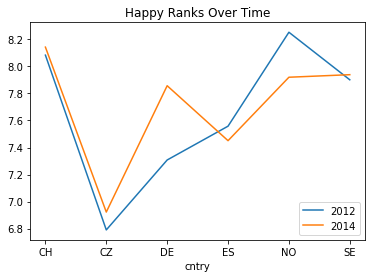

T-Test Results by Year


Ttest_indResult(statistic=-0.19659777140140894, pvalue=0.848230162505955)

In [16]:
# create graph of happiness by country, with each new line represents a different year
fig = df_2[df_2.year==6][
    ['cntry', 'happy']].groupby('cntry').mean().plot()
df_2[df_2.year==7][
    ['cntry', 'happy']].groupby('cntry').mean().plot(ax=fig)
plt.legend(['2012','2014'])
plt.title('Happy Ranks Over Time')
plt.show()

# Generate a test statistic comparing test and control on treatment date
print('T-Test Results by Year')

stats.ttest_ind(df_happy[df_happy.year == 6].avg_happy, df_happy[df_happy.year == 7].avg_happy, equal_var = False)

- The plot that indicates ranks of happiness is quite close for each country for both 2012 and 2014. The exception is "DE".
- The pvalue is 0.848, which is too high above any reasonable t-test.
- There is no statistical difference between the population and we failed to negate the null hypothesis.
- We can not state that 2014 population was happier than in 2012.

### 3) Who reported watching more TV in 2012, men or women?

In [17]:
# male = 1
# female = 2

# find sums of each gender in 2012
sum_men = df_2.loc[(df_2['gndr']==1) & (df_2['year']==6), 'idno'].count()
sum_women = df_2.loc[(df_2['gndr']==2) & (df_2['year']==6), 'idno'].count()

print('Total men: ' + str(sum_men))
print('Total women: ' + str(sum_women))

Total men: 2053
Total women: 2018


In [18]:
# sum tvtot for each gender in 2012
sum_tv_men = df_2.loc[(df_2['gndr']==1) & (df_2['year']==6), 'tvtot'].sum()
sum_tv_women = df_2.loc[(df_2['gndr']==2) & (df_2['year']==6), 'tvtot'].sum()

print('Total TV men: ' + str(sum_tv_men))
print('Total TV women: ' + str(sum_tv_women))

Total TV men: 7923.0
Total TV women: 7881.0


In [19]:
# take the avg of tv watch rank by population of men and women
avg_tv_men = sum_tv_men / sum_men
avg_tv_women = sum_tv_women / sum_women

print('Men Watched TV in 2012: ' + str(avg_tv_men))
print('Women Watched TV in 2012: ' + str(avg_tv_women))

Men Watched TV in 2012: 3.8592303945445687
Women Watched TV in 2012: 3.9053518334985133


- In 2012, women watched slightly more TV than men on average.

### 4) Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [20]:
# partner = 1
# no partner = 2

# count people based on partners in 2012
sum_partners = df_2.loc[(df_2['partner']==1) & (df_2['year']==6), 'idno'].count()
sum_single = df_2.loc[(df_2['partner']==2) & (df_2['year']==6), 'idno'].count()

print('People with partners in 2012: ' + str(sum_partners))
print('People without partners in 2012: ' + str(sum_single))

People with partners in 2012: 2542
People without partners in 2012: 1529


In [21]:
# sum pplfair in 2012 based on partner status
sum_fairness_partners = df_2.loc[(df_2['partner']==1) & (df_2['year']==6), 'pplfair'].sum()
sum_fairness_single = df_2.loc[(df_2['partner']==2) & (df_2['year']==6), 'pplfair'].sum()

print('Total Fairness by Partners: ' + str(sum_fairness_partners))
print('Total Fairness by Singles: ' + str(sum_fairness_single))

Total Fairness by Partners: 15441.0
Total Fairness by Singles: 8969.0


In [22]:
# take the avg of fairness rank by population of partner status
avg_fairness_partners = sum_fairness_partners / sum_partners
avg_fairness_singles = sum_fairness_single / sum_single

print('Men Watched TV in 2012: ' + str(avg_fairness_partners))
print('Women Watched TV in 2012: ' + str(avg_fairness_singles))

Men Watched TV in 2012: 6.0743509047993705
Women Watched TV in 2012: 5.86592544146501


- On average, people who lived with partners were more likely to think that people were fair in 2012

### 5) Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [23]:
df_2.cntry.value_counts()

ES    2292
SE    1726
CH    1475
NO    1420
CZ    1207
DE      27
Name: cntry, dtype: int64

In [24]:
df_sample = df_2.loc[df_2['cntry'].isin(['ES', 'SE', 'CH']) & (df_2['year']==7)].copy()

In [25]:
df_sample.groupby('cntry')['sclmeet'].sum()

cntry
CH    3845.0
ES    5969.0
SE    4712.0
Name: sclmeet, dtype: float64

In [26]:
# count people based on country
sum_CH = df_sample.loc[(df_sample['cntry']=='CH'), 'idno'].count()
sum_ES = df_sample.loc[(df_sample['cntry']=='ES'), 'idno'].count()
sum_SE = df_sample.loc[(df_sample['cntry']=='SE'), 'idno'].count()

# average age based on country
avg_age_CH = df_sample.loc[(df_sample['cntry']=='CH'), 'agea'].mean()
avg_age_ES = df_sample.loc[(df_sample['cntry']=='ES'), 'agea'].mean()
avg_age_SE = df_sample.loc[(df_sample['cntry']=='SE'), 'agea'].mean()

print('Avg age for CH: ' + str(avg_age_CH))
print('Avg age for ES: ' + str(avg_age_ES))
print('Avg age for SE: ' + str(avg_age_SE))

Avg age for CH: 46.10228802153432
Avg age for ES: 47.64021164021164
Avg age for SE: 49.31718569780853


In [27]:
df_sample.loc[df_sample['cntry']=='CH'].describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,743.000000,743.0,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000
mean,1471.051144,7.0,3.028264,5.764468,6.203230,5.663526,8.142665,5.174966,2.784657,1.515478,46.102288,1.379542
std,840.208386,0.0,1.898505,2.119026,2.022219,1.972821,1.374036,1.301696,0.906360,0.500097,18.792104,0.485600
min,5.000000,7.0,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,16.000000,1.000000
25%,752.500000,7.0,2.000000,5.000000,5.000000,4.000000,8.000000,4.000000,2.000000,1.000000,31.000000,1.000000
50%,1410.000000,7.0,3.000000,6.000000,7.000000,6.000000,8.000000,6.000000,3.000000,2.000000,45.000000,1.000000
75%,2232.500000,7.0,4.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,60.000000,2.000000
max,2905.000000,7.0,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,92.000000,2.000000


In [28]:
df_sample.loc[df_sample['cntry']=='ES'].describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,1134.000000,1134.0,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000
mean,1463.258377,7.0,3.944444,4.940035,5.353616,4.342152,7.450617,5.263668,2.631393,1.493827,47.640212,1.397707
std,818.996448,0.0,2.004738,2.117869,2.115633,2.216691,1.838284,1.437784,0.950645,0.500182,18.261685,0.489640
min,1.000000,7.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,16.000000,1.000000
25%,799.750000,7.0,2.000000,3.000000,4.000000,3.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1443.500000,7.0,4.000000,5.000000,5.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2178.000000,7.0,6.000000,6.750000,7.000000,6.000000,9.000000,6.000000,3.000000,2.000000,60.750000,2.000000
max,2865.000000,7.0,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,101.000000,2.000000


In [29]:
df_sample.loc[df_sample['cntry']=='SE'].describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,867.000000,867.0,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000
mean,1806.288351,7.0,3.575548,6.239908,6.816609,6.062284,7.938870,5.434833,2.878893,1.480969,49.317186,1.387543
std,1094.068745,0.0,1.894383,2.005794,1.800642,1.813675,1.410027,1.370705,0.859859,0.499926,19.743265,0.487471
min,7.000000,7.0,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000,1.000000,15.000000,1.000000
25%,866.500000,7.0,2.000000,5.000000,6.000000,5.000000,7.000000,4.000000,2.000000,1.000000,32.000000,1.000000
50%,1660.000000,7.0,4.000000,7.000000,7.000000,6.000000,8.000000,6.000000,3.000000,1.000000,51.000000,1.000000
75%,2784.000000,7.0,5.000000,8.000000,8.000000,7.000000,9.000000,7.000000,3.000000,2.000000,66.000000,2.000000
max,3746.000000,7.0,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


There were several observations but one that stood out is "CH". 
- In total numbers, they went out less but on average, weren't drastically behind the other 2 countries. 
- They had the highest happiness rank
- CH had the youngest population on average
- CH had the most people living with partners on average

### 6) Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [30]:
df_sample_2 = df_2.loc[df_2['cntry'].isin(['NO', 'SE', 'CZ']) & (df_2['year']==7)].copy()

In [31]:
# calc avg and std for both age for social activities
df_social = df_2.groupby(['agea', 'cntry'])['sclact'].agg(['sum', 'mean', 'std']).reset_index()

df_social.rename(columns={'mean': 'avg_social'}, inplace=True)

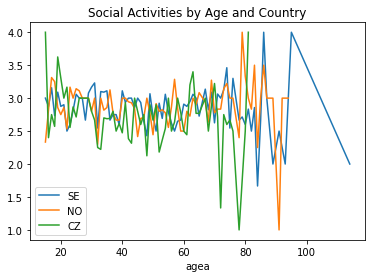

In [32]:
# create graph of social activities by age, with each new line represents a different country
fig = df_sample_2[df_sample_2.cntry=='SE'][
    ['agea', 'sclact']].groupby('agea').mean().plot()
df_sample_2[df_sample_2.cntry=='NO'][
    ['agea', 'sclact']].groupby('agea').mean().plot(ax=fig)
df_sample_2[df_sample_2.cntry=='CZ'][
    ['agea', 'sclact']].groupby('agea').mean().plot(ax=fig)
plt.legend(['SE','NO','CZ'])
plt.title('Social Activities by Age and Country')
plt.show()


- SE appears to record the oldest population out of the other countries.
- CZ appears to stop records around 80 years old
- CZ records the least amount of social gatherings from 70-80 years old compared to the other countries.